In [1]:
import scipy.io as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_interactions import hyperslicer

%matplotlib ipympl

In [2]:
mat_contents = sp.loadmat('results0_7.mat') # - Could only export certain number at a time, so first 8 are
print(mat_contents.keys())                  #   this file and next 4 are in the second file
x_0_7 = mat_contents.get('results')

mat_contents = sp.loadmat('results7_10.mat')
x_8_11 = mat_contents.get('results')

print (type(x_8_11))
print (np.shape(x_8_11[0][0][1])) # - Image number 9 (seond file contains 8 through 11, so index 1 is 9.
                                  # - We could just combine the two files after importing
                                  # - Not quite sure yet why we need two extra 0 indices, but maybe from the
                                  #   conversion from .mat? Also I cannot figure out if the axial slices
                                  #   are in there, or if hyperslicer just defaultst ot sagttal, we might need
                                  #   to switch around the subarrays/columns for axial slices
                
''' From Heejong:
        "S0 image was made of the first ~2 and half minutes of 30 minutes 
        period, and S10 was from the last ~3 and half minutes of the 30 minutes.
        The coincidence counts are ~45K for each image."
'''

dict_keys(['__header__', '__version__', '__globals__', 'A', 'M', 'NUM', 'RAW', 'TMR', 'TMR_new', 'TMRmask', 'TXT', 'ans', 'data', 'data_TMR', 'data_uCi', 'grayImage', 'i', 'ktrans', 'mask', 'pCell', 'po2', 'po2_new', 'po2mask', 'props', 'results', 'subj', 'test', 'thresh', 'thresh10', 'uCi', 've', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin'])
<class 'numpy.ndarray'>
(72, 72, 52)


' From Heejong:\n        "S0 image was made of the first ~2 and half minutes of 30 minutes \n        period, and S10 was from the last ~3 and half minutes of the 30 minutes.\n        The coincidence counts are ~45K for each image."\n'

0.10505247116088867


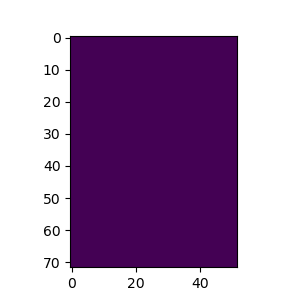

In [3]:
# - Data is reconstructed every ~3 mins, for ~45 mins, we have 10 images
# - I have never used hyperslicer, but each one requires a seperate subplot instance, and
#   play sliders are not stuck to figures so multiple in a single cell looks really bad

# To use it, just press the play button and it will go through all of the slices for a single scan


# Full pet image for 45 mins
print (np.max(x_0_7[0][0][0])) # roughly what vmax should be
fig, ax = plt.subplots(figsize=(3,3))
normal_img = hyperslicer(x_0_7[0][0][0], vmin=0, vmax=0.1, play_buttons=True, play_button_pos="left")

0.016753701493144035


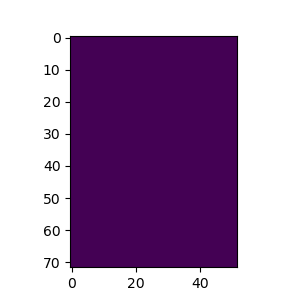

In [4]:
# First 3 mins
# note vmax is less than for full image since intensity is lower

print (np.max(x_0_7[0][0][1]))
fig1, ax1 = plt.subplots(figsize=(3,3))
normal_img = hyperslicer(x_0_7[0][0][1], vmin=0, vmax=0.017, play_buttons=True, play_button_pos="left")

0.01441351231187582


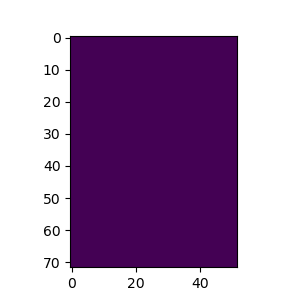

In [5]:
# Last few mins

print (np.max(x_8_11[0][0][-1]))
fig1, ax1 = plt.subplots(figsize=(3,3))
normal_img = hyperslicer(x_8_11[0][0][-1], vmin=0, vmax=0.017, play_buttons=True, play_button_pos="left")

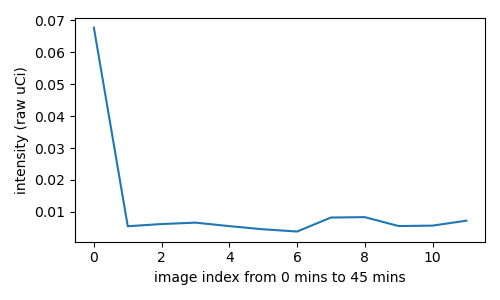

In [6]:
# quick calculation for a single voxel across all images:

length = len(x_0_7[0][0]) + len(x_8_11[0][0])
vals = []
for i,val in enumerate(range(length)):
    if i <= 7:
        vals.append(x_0_7[0][0][i][34][46][23]) # (x,y,z) = (34,46,23), z is slice index
    else:
        j = i-8
        vals.append(x_8_11[0][0][j][34][46][23])

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(vals) # first value is from full PET scan
pparam = dict(xlabel='image index from 0 mins to 45 mins', ylabel='intensity (raw uCi)')
ax.set(**pparam)
fig.tight_layout()

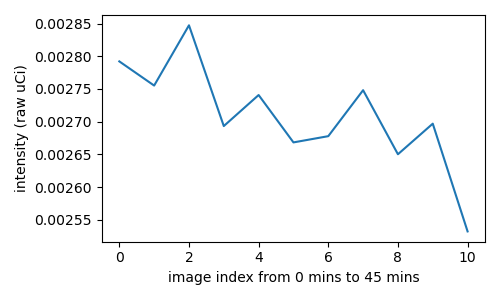

In [7]:
# quick calculation for an ROI across all images:

length = len(x_0_7[0][0]) + len(x_8_11[0][0])
vals = []
s = 10

x_val = 34
y_val = 46
z_val = 23

for i,val in enumerate(range(length)):
    if i <= 7:
        temp = []
        for x, valx in enumerate(range(s)):
            for y, valy in enumerate(range(s)):
                for z,valz in enumerate(range(s)):
                    x_ind = int(x_val-s/2+x)
                    y_ind = int(y_val-s/2+y)
                    z_ind = int(z_val-s/2+z)
                    temp.append(x_0_7[0][0][i][x_ind][y_ind][z_ind])
        vals.append(np.mean(temp))
    else:
        j = i-8
        temp = []
        for x, valx in enumerate(range(s)):
            for y, valy in enumerate(range(s)):
                for z,valz in enumerate(range(s)):
                    x_ind = int(x_val-s/2+x)
                    y_ind = int(y_val-s/2+y)
                    z_ind = int(z_val-s/2+z)
                    temp.append(x_8_11[0][0][j][x_ind][y_ind][z_ind])
        vals.append(np.mean(temp))
        
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(vals[1:]) # first value is from full PET scan, took it out here
pparam = dict(xlabel='image index from 0 mins to 45 mins', ylabel='intensity (raw uCi)')
ax.set(**pparam)
#ax.set_yscale('log')
fig.tight_layout()